In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#datasets

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [3]:
#convertendo para tensores
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)
device

'cuda'

In [5]:
#criando a rede neural

class MyNeuralNet(nn.Module):
  def __init__(self):    
    super().__init__()
    self.layer1 = nn.Linear(2,8)
    self.activation = nn.ReLU()
    self.layer2 =  nn.Linear(8,1)

  def forward(self,x):
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    return x

In [6]:
#criando o modelo

model = MyNeuralNet()
model = model.to(device)

In [7]:
#definindo a loss function e o otimizador

loss_func = nn.MSELoss()
opt = SGD(model.parameters(), lr=0.001)

In [8]:
losses = []

#treinando por 50 épocas

for _ in range(50):
    opt.zero_grad() #configura os gradientes para 0
    loss_value = loss_func(model(X), Y)
    loss_value.backward()

    opt.step()
    losses.append(loss_value.cpu().detach().numpy())

Text(0, 0.5, 'Loss')

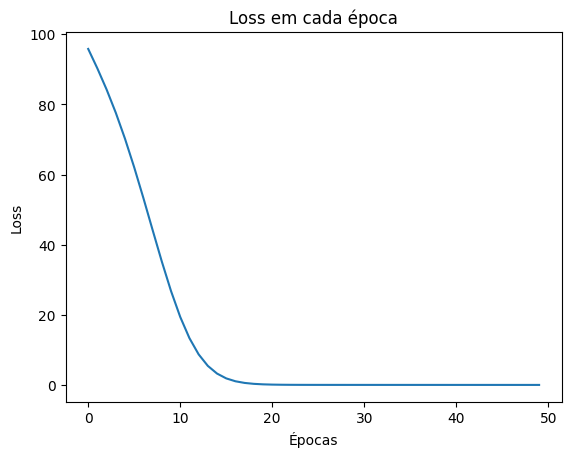

In [9]:
plt.plot(losses)
plt.title('Loss em cada época')
plt.xlabel('Épocas')
plt.ylabel('Loss')